In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
Books=pd.read_csv(r"C:\Mba notes\novels\project data\Book Recommendation\Books.csv")
Books.head()

C:\Mba notes\novels\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
Ratings=pd.read_csv(r"C:\Mba notes\novels\project data\Book Recommendation\Ratings.csv")
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
Users=pd.read_csv(r"C:\Mba notes\novels\project data\Book Recommendation\Users.csv")
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
df=pd.merge(Ratings,Users,on='User-ID')
df1=pd.merge(df,Books,on="ISBN")
df1.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [6]:
df1.isnull().any()

User-ID                False
ISBN                   False
Book-Rating            False
Location               False
Age                     True
Book-Title             False
Book-Author             True
Year-Of-Publication    False
Publisher               True
Image-URL-S            False
Image-URL-M            False
Image-URL-L             True
dtype: bool

In [7]:
df1.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

C:\Mba notes\novels\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


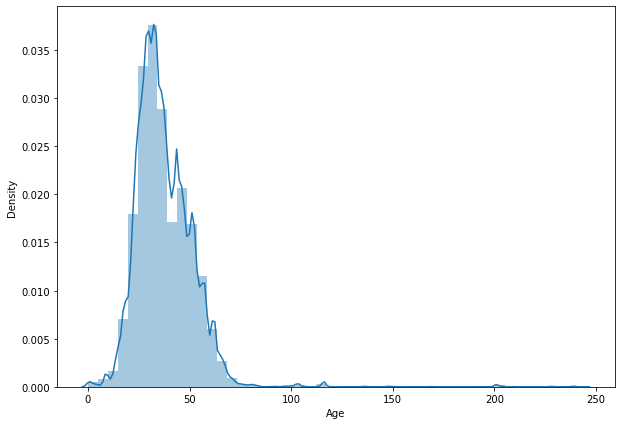

In [8]:
plt.figure(figsize=(10,7))
sn.distplot(df1['Age'])

In [9]:
df1['Age'].quantile(0.98)

65.0

In [10]:
df1['Age'].quantile(0.01)

14.0

In [11]:
df1["Age"].std()

14.098254229794385

In [12]:
upper=df1["Age"].mean()+2*df1['Age'].std()
lower=df1["Age"].mean()-2*df1['Age'].std()
upper,lower

(65.59415694273163, 9.201140023554089)

In [13]:
df2=df1[(df1["Age"]>=lower) & (df1["Age"]<=upper)]
len(df1)

1031136

In [14]:
df2["Age"].describe()

count    735483.000000
mean         36.712706
std          11.366723
min          10.000000
25%          28.000000
50%          35.000000
75%          45.000000
max          65.000000
Name: Age, dtype: float64

In [15]:
df2.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            2
dtype: int64

In [16]:
df3=df2.dropna()

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735478 entries, 1 to 1031133
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              735478 non-null  int64  
 1   ISBN                 735478 non-null  object 
 2   Book-Rating          735478 non-null  int64  
 3   Location             735478 non-null  object 
 4   Age                  735478 non-null  float64
 5   Book-Title           735478 non-null  object 
 6   Book-Author          735478 non-null  object 
 7   Year-Of-Publication  735478 non-null  object 
 8   Publisher            735478 non-null  object 
 9   Image-URL-S          735478 non-null  object 
 10  Image-URL-M          735478 non-null  object 
 11  Image-URL-L          735478 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 72.9+ MB


In [18]:
df3["Year-Of-Publication"]=df3["Year-Of-Publication"].astype('int64')

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [19]:
df3["Year-Of-Publication"].describe()

count    735478.000000
mean       1967.800681
std         232.932720
min           0.000000
25%        1992.000000
50%        1997.000000
75%        2001.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

In [20]:
df3[df3['Year-Of-Publication']<=100]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1885,40012,0571058086,0,"new plymouth, taranaki, new zealand",44.0,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...
1886,134837,0571058086,10,"kuala lumpur, wilayah persekutuan, malaysia",28.0,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...
1887,180430,0571058086,6,"roma, lazio, italy",19.0,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...
1889,231857,0571058086,0,"canberra, australian capital territory, australia",46.0,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...
1890,241432,0571058086,0,"budenheim, rheinland-pfalz, germany",23.0,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...,http://images.amazon.com/images/P/0571058086.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1030649,275667,8807811073,7,"montespertoli, toscana, italy",19.0,Garzanti - Gli Elefanti: Il Giudice E Il Suo Boia,F Durrenmatt,0,Feltrinelli,http://images.amazon.com/images/P/8807811073.0...,http://images.amazon.com/images/P/8807811073.0...,http://images.amazon.com/images/P/8807811073.0...
1030994,276487,2090319801,0,"teruel, aragon, spain",21.0,Lectures CLE En Francais Facile - Level 2: Rob...,Dumas,0,CLE International,http://images.amazon.com/images/P/2090319801.0...,http://images.amazon.com/images/P/2090319801.0...,http://images.amazon.com/images/P/2090319801.0...
1031015,276538,3150000416,0,"cologne, ,",26.0,Wallensteins Lager / Die Piccolomini,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000416.0...,http://images.amazon.com/images/P/3150000416.0...,http://images.amazon.com/images/P/3150000416.0...
1031016,276538,3150000629,6,"cologne, ,",26.0,Konig Richard Der Dritte,William Shakespeare,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000629.0...,http://images.amazon.com/images/P/3150000629.0...,http://images.amazon.com/images/P/3150000629.0...


In [21]:
df3.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [22]:
df4=df3[['User-ID', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher']]
df4.shape

(735478, 8)

In [23]:
df5=df4.sample(20000)

In [24]:
df5.head()

,User-ID,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
411505,195132,0,"singapore, n/a, singapore",24.0,Going Home,Danielle Steel,1991,Pocket
891120,115003,0,"asheville, north carolina, usa",43.0,Making Wild Wines &amp; Meads: 125 Unusual Rec...,Pattie Vargas,1999,Storey Books
721525,62895,6,"chesterfield, derbyshire, united kingdom",39.0,Shadowed Hills,Audrey Howard,1997,Trafalgar Square
9149,30806,8,"halifax, nova scotia, canada",24.0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
254086,98391,9,"morrow, georgia, usa",52.0,Must Be Magic,Patricia Rice,2002,Signet Book


In [25]:
df5['Book-Rating'].mean()

2.7398

In [26]:
df5.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head()

Book-Title
House of Women: A Novel                                                                  10.0
Das Leben, Das Universum Und Der Ganze Rest (Fiction, Poetry and Drama)                  10.0
The Blind Watchmaker: Why the Evidence of Evolution Reveals a Universe Without Design    10.0
If Chins Could Kill : Confessions of a B Movie Actor                                     10.0
Back to Basics                                                                           10.0
Name: Book-Rating, dtype: float64

In [27]:
df4.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,735478.000000,735478.000000,735478.000000,735478.000000
mean,140971.265070,2.766907,36.712711,1967.800681
std,78658.833555,3.864989,11.366706,232.932720
min,2.000000,0.000000,10.000000,0.000000
25%,74113.000000,0.000000,28.000000,1992.000000
50%,140705.000000,0.000000,35.000000,1997.000000
75%,208406.000000,7.000000,45.000000,2001.000000
max,278852.000000,10.000000,65.000000,2050.000000


In [28]:
df5.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,20000.000000,20000.00000,20000.000000,20000.000000
mean,140732.508750,2.73980,36.773050,1968.045700
std,78763.890297,3.86108,11.347016,231.641051
min,212.000000,0.00000,10.000000,0.000000
25%,73399.000000,0.00000,28.000000,1991.000000
50%,140375.000000,0.00000,35.000000,1997.000000
75%,208396.250000,7.00000,45.000000,2001.000000
max,278843.000000,10.00000,65.000000,2026.000000


C:\Mba notes\novels\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


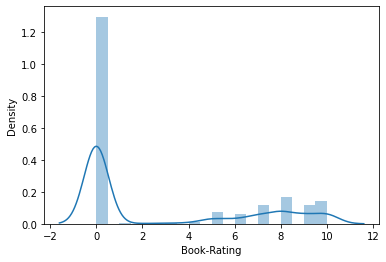

In [29]:
sn.distplot(df5['Book-Rating'])

C:\Mba notes\novels\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


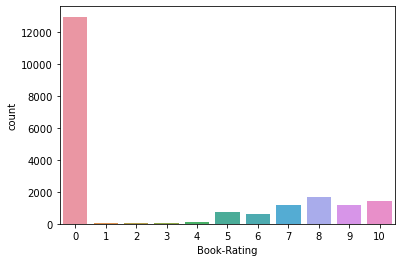

In [30]:
sn.countplot(df5["Book-Rating"])

In [31]:
df5

,User-ID,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
411505,195132,0,"singapore, n/a, singapore",24.0,Going Home,Danielle Steel,1991,Pocket
891120,115003,0,"asheville, north carolina, usa",43.0,Making Wild Wines &amp; Meads: 125 Unusual Rec...,Pattie Vargas,1999,Storey Books
721525,62895,6,"chesterfield, derbyshire, united kingdom",39.0,Shadowed Hills,Audrey Howard,1997,Trafalgar Square
9149,30806,8,"halifax, nova scotia, canada",24.0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
254086,98391,9,"morrow, georgia, usa",52.0,Must Be Magic,Patricia Rice,2002,Signet Book
...,...,...,...,...,...,...,...,...
547604,201636,0,"weeki wachee, florida, usa",48.0,Firefly Beach,Luanne Rice,2001,Bantam Books
142549,165319,8,"tucson, arizona, usa",28.0,Behind the Attic Wall (Avon Camelot Books (Pap...,Sylvia Cassedy,1985,HarperTrophy
329268,104429,0,"brainerd, minnesota, usa",39.0,Plain Jane,Fern Michaels,2002,Zebra Books
676169,114368,0,"mechanicsville, maryland, usa",33.0,Silent Night,J. D. Robb,1998,Jove Books


In [32]:
col=['Location','Book-Title','Book-Author','Publisher']
features=df5['Location']+df5['Book-Title']+df5['Book-Author']+df5['Publisher']
df5['features']=features

In [33]:
df5.head()

,User-ID,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,features
411505,195132,0,"singapore, n/a, singapore",24.0,Going Home,Danielle Steel,1991,Pocket,"singapore, n/a, singaporeGoing HomeDanielle St..."
891120,115003,0,"asheville, north carolina, usa",43.0,Making Wild Wines &amp; Meads: 125 Unusual Rec...,Pattie Vargas,1999,Storey Books,"asheville, north carolina, usaMaking Wild Wine..."
721525,62895,6,"chesterfield, derbyshire, united kingdom",39.0,Shadowed Hills,Audrey Howard,1997,Trafalgar Square,"chesterfield, derbyshire, united kingdomShadow..."
9149,30806,8,"halifax, nova scotia, canada",24.0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),"halifax, nova scotia, canadaThe Joy Luck ClubA..."
254086,98391,9,"morrow, georgia, usa",52.0,Must Be Magic,Patricia Rice,2002,Signet Book,"morrow, georgia, usaMust Be MagicPatricia Rice..."


In [34]:
df5.index[:5]

Int64Index([174074, 509464, 739712, 635623, 90043], dtype='int64')

In [35]:
index=np.arange(0,len(df5))
df5['index']=index
df5.set_index('index',inplace=True)
df5.head()

,User-ID,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,features
index,,,,,,,,,
0,251140,1,"redding, california, usa",25.0,My Point...And I Do Have One,ELLEN DEGENERES,1996,Bantam,"redding, california, usaMy Point...And I Do Ha..."
1,92547,0,"baker city, oregon, usa",29.0,Sushi for Beginners,Marian Keyes,2004,HarperTorch,"baker city, oregon, usaSushi for BeginnersMari..."
2,108176,6,"apex, north carolina, usa",12.0,The School Story,Brian Selznick,2002,Aladdin Publishing Company,"apex, north carolina, usaThe School StoryBrian..."
3,28360,0,"oakwood, georgia, usa",15.0,Titan A. E.: Akima's Story,Kevin J. Anderson,2000,Ace Books,"oakwood, georgia, usaTitan A. E.: Akima's Stor..."
4,37712,10,"cincinnati, ohio, usa",23.0,Rebecca,Daphne Du Maurier,1994,Avon,"cincinnati, ohio, usaRebeccaDaphne Du MaurierAvon"


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df5['features'])
tfidf_matrix.shape

(20000, 42542)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
cs=cosine_similarity(tfidf_matrix)

In [38]:
cs[:5]

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02514023],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.03626155, 0.        ,
        0.02852691],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
indices = pd.Series(df5.index, index=df5['Book-Title']).drop_duplicates()

In [40]:
indices

Book-Title
My Point...And I Do Have One                                                                              0
Sushi for Beginners                                                                                       1
The School Story                                                                                          2
Titan A. E.: Akima's Story                                                                                3
Rebecca                                                                                                   4
                                                                                                      ...  
An American Childhood                                                                                 19995
No Good Deed                                                                                          19996
Don't Know Much About the Bible: Everything You Need to Know About the Good Book but Never Learned    19997
SPELLBINDER      

In [53]:
def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cs[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df4['Book-Title'].iloc[movie_indices]

In [54]:
recommend('Sushi for Beginners')

8189                   The Da Vinci Code
9196                   The Joy Luck Club
11432                        Wild Animus
10260                        Wild Animus
11860                        Wild Animus
21913                        The Summons
20045                       Dreamcatcher
12218    Momo (Spanish Language Edition)
4813                    Der Regenmacher.
24546                Angels &amp; Demons
Name: Book-Title, dtype: object

In [121]:
recommend1('Sushi for Beginners')

2559                                  The X-Files: Goblins
6287     Politically Correct Bedtime Stories: Modern Ta...
6464         Sushi for Beginners : A Novel (Keyes, Marian)
6983                             The Lovely Bones: A Novel
7282                             The Lovely Bones: A Novel
7359                             The Lovely Bones: A Novel
8552                                     The Da Vinci Code
10087                                          Wild Animus
11137                                          Wild Animus
13125          Et Si C'Etait Vrai / If This Were Only True
Name: Book-Title, dtype: object

In [123]:
a=[2,3,4,5]
b=[4,5,6,7]
set(a).intersection(b)

{4, 5}

In [138]:
cs1=cosine_similarity(numerical_features)
cs1[:3]

array([[1.        , 0.99999798, 0.99997556, ..., 0.99998549, 0.99992725,
        0.9999757 ],
       [0.99999798, 1.        , 0.99995959, ..., 0.99998699, 0.99994643,
        0.99998746],
       [0.99997556, 0.99995959, 1.        , ..., 0.9999529 , 0.99983412,
        0.9999046 ]])

In [139]:
def recommend1(title):
    idx = indices[title]
    sim_scores = list(enumerate(cs1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df4['Book-Title'].iloc[movie_indices]

In [143]:
def recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cs[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores
    movie_indices = [i[0] for i in sim_scores]
    return df4['Book-Title'].iloc[movie_indices]
def recommend1(title):
    idx = indices[title]
    sim_scores = list(enumerate(cs1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores
    movie_indices = [i[0] for i in sim_scores]
    return df4['Book-Title'].iloc[movie_indices]
def final_recommend(title):
    return list(set(recommend(title)).intersection(recommend1(title)))[:10]

In [147]:
final_recommend('Sushi for Beginners')

['Fight Club',
 'Reading Lolita in Tehran: A Memoir in Books',
 "Rockin' Your World: 'N Sync/Five Flip Book (Rockin' Your World)",
 'Dunkle Kammern.',
 'Warrior Class',
 "Gunman's Rhapsody",
 'Fire Ice: A Novel from the NUMA Files',
 'Slob',
 'Durch TeebaumÃ?Â¶l gesund und schÃ?Â¶n.',
 'God Game']

<font color= 'red'>Now applying ML algos</font>

In [56]:
ind=np.arange(1,len(df5)+1)
df5=df5.set_index(ind)
df5.head()

,User-ID,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,features
1,195132,0,"singapore, n/a, singapore",24.0,Going Home,Danielle Steel,1991,Pocket,"singapore, n/a, singaporeGoing HomeDanielle St..."
2,115003,0,"asheville, north carolina, usa",43.0,Making Wild Wines &amp; Meads: 125 Unusual Rec...,Pattie Vargas,1999,Storey Books,"asheville, north carolina, usaMaking Wild Wine..."
3,62895,6,"chesterfield, derbyshire, united kingdom",39.0,Shadowed Hills,Audrey Howard,1997,Trafalgar Square,"chesterfield, derbyshire, united kingdomShadow..."
4,30806,8,"halifax, nova scotia, canada",24.0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),"halifax, nova scotia, canadaThe Joy Luck ClubA..."
5,98391,9,"morrow, georgia, usa",52.0,Must Be Magic,Patricia Rice,2002,Signet Book,"morrow, georgia, usaMust Be MagicPatricia Rice..."


In [206]:
from sklearn.preprocessing import MinMaxScaler
df6=df5[['Book-Rating','Age']]
s=MinMaxScaler()
df6[['Book-Rating','Age']]=s.fit_transform(df6[['Book-Rating','Age']])
df6.head()

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Book-Rating,Age
1,0.0,0.254545
2,0.0,0.600000
3,0.6,0.527273
4,0.8,0.254545
5,0.9,0.763636


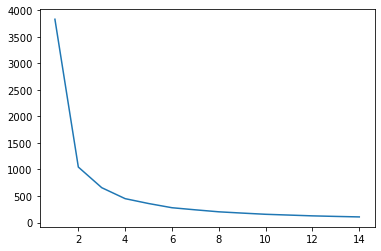

In [207]:
from sklearn.cluster import KMeans
sse=[]
k_rng=range(1,15)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df6[['Book-Rating','Age']])
    sse.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,15),sse)

In [208]:
df6['Book-Title']=df5['Book-Title']
df6.head()

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Book-Rating,Age,Book-Title
1,0.0,0.254545,Going Home
2,0.0,0.600000,Making Wild Wines &amp; Meads: 125 Unusual Rec...
3,0.6,0.527273,Shadowed Hills
4,0.8,0.254545,The Joy Luck Club
5,0.9,0.763636,Must Be Magic


In [209]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df6.drop('Book-Title',1),df6['Book-Title'],test_size=0.8)

<ipython-input-209-8db21a0dae19>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test=train_test_split(df6.drop('Book-Title',1),df6['Book-Title'],test_size=0.8)


In [210]:
kn=KMeans(n_clusters=4)
y_predicted=kn.fit(df6.drop('Book-Title',1),df6['Book-Title'])
p=kn.predict(df6.drop('Book-Title',1))

<ipython-input-210-c2aab9ec2070>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y_predicted=kn.fit(df6.drop('Book-Title',1),df6['Book-Title'])
<ipython-input-210-c2aab9ec2070>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  p=kn.predict(df6.drop('Book-Title',1))


In [211]:
df6['cluster']=p
df6.columns

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Index(['Book-Rating', 'Age', 'Book-Title', 'cluster'], dtype='object')

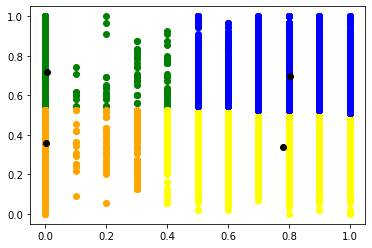

In [212]:
k1=df6[df6["cluster"]==0]
k2=df6[df6["cluster"]==1]
k3=df6[df6["cluster"]==2]
k4=df6[df6["cluster"]==3]
plt.scatter(k1["Book-Rating"],k1["Age"],color="green")
plt.scatter(k2["Book-Rating"],k2["Age"],color="yellow")
plt.scatter(k3["Book-Rating"],k3["Age"],color="blue")
plt.scatter(k4["Book-Rating"],k4["Age"],color="orange")
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color="black")

In [213]:
k1

,Book-Rating,Age,Book-Title,cluster
2,0.0,0.600000,Making Wild Wines &amp; Meads: 125 Unusual Rec...,0
6,0.0,0.945455,The General Electric microwave guide &amp; coo...,0
10,0.0,0.600000,Jennie,0
13,0.0,0.872727,Heat Wave (Best Of The Best) (Best of the Best...,0
16,0.0,0.563636,Someone Like You,0
...,...,...,...,...
19980,0.0,0.545455,Bobby Baseball,0
19986,0.0,0.618182,"Churches, Jails, and Gold Mines : Mega-Deals f...",0
19992,0.0,0.854545,The Joy Luck Club,0
19996,0.0,0.690909,Firefly Beach,0


In [214]:
tmp1=x_train[0:2]
tmp1

,Book-Rating,Age
18154,0.0,0.836364
8696,0.0,0.363636


In [215]:
k

14

In [216]:
k=df6[df6["cluster"]==0]
k.sort_values(by=['Book-Rating'],ascending=False)

,Book-Rating,Age,Book-Title,cluster
14418,0.4,0.763636,Accordion Crimes,0
12480,0.4,0.927273,Riven Rock,0
15183,0.4,0.600000,The Cider House Rules,0
8991,0.4,0.763636,Gnostic Book of Hours: Keys to Inner Wisdom,0
479,0.4,0.763636,The Boys of Swithins Hall,0
...,...,...,...,...
6942,0.0,0.945455,Christmas Time at Santa's Workshop (A Troll Po...,0
6932,0.0,0.709091,Treasures,0
6931,0.0,0.654545,Sweet Valley High #02: Secrets (Sweet Valley H...,0
6928,0.0,0.672727,Workaholics: The Respectable Addicts,0


In [220]:
def recommend(rating,Age):
    ar=np.array([0,45])
    ar=s.fit_transform([ar])
    p=kn.predict(ar)
    k=df6[df6["cluster"]==0]
    k.sort_values(by=['Book-Rating'],ascending=False)
    return k['Book-Title'][:20]

In [221]:
recommend(10,44)

2     Making Wild Wines &amp; Meads: 125 Unusual Rec...
6     The General Electric microwave guide &amp; coo...
10                                               Jennie
13    Heat Wave (Best Of The Best) (Best of the Best...
16                                     Someone Like You
19                 Uncle John's Seventh Bathroom Reader
23                             In the Lake of the Woods
25                         Wit and Humor of Oscar Wilde
30                           La cerise sur le gÃ?Â¢teux
32                                    Praying for Sleep
38                        Why Girls Are Weird : A Novel
40                                Cold Tea On A Hot Day
41                            Les amours d'Emily Turner
46    We Wish to Inform You That Tomorrow We Will be...
49    Bram Stoker's Dracula: The Film and the Legend...
51                                               Rebels
53                            The Hundred Secret Senses
54                                     Higher Au

<font color='red'>ML model in this</font>

In [219]:
df5.shape

(20000, 9)

In [197]:
df7=df5[['Book-Rating','Age','Book-Title']]

In [198]:
df7

,Book-Rating,Age,Book-Title
1,0,24.0,Going Home
2,0,43.0,Making Wild Wines &amp; Meads: 125 Unusual Rec...
3,6,39.0,Shadowed Hills
4,8,24.0,The Joy Luck Club
5,9,52.0,Must Be Magic
...,...,...,...
19996,0,48.0,Firefly Beach
19997,8,28.0,Behind the Attic Wall (Avon Camelot Books (Pap...
19998,0,39.0,Plain Jane
19999,0,33.0,Silent Night


In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
model=RandomForestClassifier()
model.fit(df7.drop('Book-Title',1),df7['Book-Title'])

<ipython-input-199-e39c72609a96>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  model.fit(df7.drop('Book-Title',1),df7['Book-Title'])


RandomForestClassifier()

In [202]:
model.predict([[10,44]])

array(['Jack and Jill : From the Original Publisher'], dtype=object)

# New One

In [9]:
df1=pd.read_csv(r"C:\Mba notes\novels\project data\Book Recommendation\1\result_final.csv")

In [10]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,link,text,title,date,keywords,summary,title_summary
0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
3,3,3,http://techcrunch.com/2020/09/09/groww-an-inve...,Even as more than 150 million people are using...,"Groww, an investment app for millennials in In...",2020-09-09 00:00:00,"['world', 'yc', 'continuity', 'stocks', 'groww...","YC Continuity, the growth-stage investment fun...","Groww, an investment app for millennials in In..."
4,4,4,http://techcrunch.com/2020/09/15/lanzatech-is-...,As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...,2020-09-15 00:00:00,"['production', 'distributed', 'developing', 's...",As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...


# New One

In [103]:
df1=pd.read_csv(r"C:\Mba notes\novels\project data\Book Recommendation\research article recommendation\train.csv",index_col="ID")
df1.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [104]:
p_col=df1.columns[2:]
arr=np.array(df1[p_col])
arr[2]

array([0, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
arr[:5]

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0]], dtype=int64)

In [108]:
for i in  arr[:5]:
    print(i)

[1 0 0 0 0 0]
[1 0 0 0 0 0]
[0 0 1 0 0 0]
[0 0 1 0 0 0]
[1 0 0 1 0 0]


In [111]:
np.argmax(arr[2])

2

In [112]:
new_col=[]
for i in arr:
    new_col.append(np.argmax(i))
df1["new_col"]=new_col
df2=df1[:-1]
df2

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,new_col
ID,,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,2
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,2
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
20967,QuickCast: Fast and Efficient Inter-Datacenter...,Large inter-datacenter transfers are crucial...,1,0,0,0,0,0,0
20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,0
20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,1


In [113]:
df2

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,new_col
ID,,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,2
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,2
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
20967,QuickCast: Fast and Efficient Inter-Datacenter...,Large inter-datacenter transfers are crucial...,1,0,0,0,0,0,0
20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,0
20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,1


In [114]:
p_col

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [115]:
d={i:j for i,j in enumerate(p_col)}
d

{0: 'Computer Science',
 1: 'Physics',
 2: 'Mathematics',
 3: 'Statistics',
 4: 'Quantitative Biology',
 5: 'Quantitative Finance'}

In [116]:
for i in range(1,len(df2)):
    df2["new_col"][i]=d[df2["new_col"][i]]

<ipython-input-116-b5ef4bca4cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["new_col"][i]=d[df2["new_col"][i]]
C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = s

In [117]:
df2

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,new_col
ID,,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Computer Science
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Computer Science
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Mathematics
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,Mathematics
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Computer Science
...,...,...,...,...,...,...,...,...,...
20967,QuickCast: Fast and Efficient Inter-Datacenter...,Large inter-datacenter transfers are crucial...,1,0,0,0,0,0,Computer Science
20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,Computer Science
20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,Physics


In [227]:
target=np.array(df2[p_col])
df3=df2.copy()
df3['target']=list(target)
df3['total_text']=df3['TITLE']+df3['ABSTRACT']
df3.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,new_col,target,total_text
ID,,,,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Computer Science,"[1, 0, 0, 0, 0, 0]",Reconstructing Subject-Specific Effect Maps P...
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Computer Science,"[1, 0, 0, 0, 0, 0]",Rotation Invariance Neural Network Rotation i...
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Mathematics,"[0, 0, 1, 0, 0, 0]",Spherical polyharmonics and Poisson kernels fo...
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,Mathematics,"[0, 0, 1, 0, 0, 0]",A finite element approximation for the stochas...
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Computer Science,"[1, 0, 0, 1, 0, 0]",Comparative study of Discrete Wavelet Transfor...


In [219]:
df2["new_col"].value_counts()

Computer Science        8594
Physics                 5521
Mathematics             4434
Statistics              1765
Quantitative Biology     447
Quantitative Finance     209
2                          1
Name: new_col, dtype: int64

In [189]:
len(df3.TITLE.unique())

20971

In [190]:
df3.isnull().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
new_col                 0
target                  0
dtype: int64

In [191]:
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow import keras

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text=tfidf.fit_transform(df3["total_text"].values)

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
title=v.fit_transform(df3['TITLE'])
title.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [230]:
model=MultinomialNB()
model.fit(text,df3['target'])

AttributeError: 'bool' object has no attribute 'any'

In [249]:
df4=df3[['total_text','target']]
df4

,total_text,target
ID,,
1,Reconstructing Subject-Specific Effect Maps P...,"[1, 0, 0, 0, 0, 0]"
2,Rotation Invariance Neural Network Rotation i...,"[1, 0, 0, 0, 0, 0]"
3,Spherical polyharmonics and Poisson kernels fo...,"[0, 0, 1, 0, 0, 0]"
4,A finite element approximation for the stochas...,"[0, 0, 1, 0, 0, 0]"
5,Comparative study of Discrete Wavelet Transfor...,"[1, 0, 0, 1, 0, 0]"
...,...,...
20967,QuickCast: Fast and Efficient Inter-Datacenter...,"[1, 0, 0, 0, 0, 0]"
20968,Contemporary machine learning: a guide for pra...,"[1, 1, 0, 0, 0, 0]"
20969,Uniform diamond coatings on WC-Co hard alloy c...,"[0, 1, 0, 0, 0, 0]"


In [231]:
text.shape

(20971, 56757)

In [240]:
from simpletransformers.classification import MultiLabelClassificationModel

In [253]:
model = MultiLabelClassificationModel(
    "roberta",
    "roberta-base",
    num_labels=6,
    args={"reprocess_input_data": True, "overwrite_output_dir": True, "num_train_epochs": 5},
    use_cuda=False
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'c

TypeError: train_model() missing 1 required positional argument: 'train_df'

In [255]:
model.train_model(df4)

C:\Mba notes\novels\Anaconda\lib\site-packages\simpletransformers\classification\classification_model.py:615: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


KeyboardInterrupt: 